### Udacity Intro to ML with pyTorch Nanodegree Notes and Code
**Section 1 Linear Regression**
- attempts to model the relationship between two variables by fitting a linear equation to observed data 

_Skill 1_: Fit a line on graph of that best fits a set data points 

$y = m_{x} +b $  - Basic line graph - slope; Y-intercept;<br>
$y = w_{1}x + w_{2} $ - Use w since weights are used in ML<br>


Tips to move point to a line:<br>
_Absolute Trick_ - if the line is not fitted perfectly you could move the line closer to the data. <br>
- ex: point (p,q) you could add 1 to the Y-intercept and the whole line moves up (-1 moves it down) <br>
you could add or subtract _p_ from the slope and. move the line back and forward on the x-axis where p is a horizontal distance to the data point<br>
thus: $y = (w_{1}x + p) + (w_{2} + 1)$ works in positive - use subrtract if other way ...

Learning Rate $\alpha$ - Since the above could move the line too much, fast we instead multiply each by a small incremental rate $\alpha$<br>
$ y = (w_{1}x + p \alpha) + (w_{2} + \alpha)$

ex: (5, 15) $\alpha$ = 0.1 --> $ y = (2x + 5 \times .1) + (3 + .1)$;
$y = (2.5)x + (3.1)$

_Square Trick_ - $(q-q^{\prime})$ - vertical distance from line to the point 
$ y = (w_{1}x + p \alpha (q-q^{\prime})) + (w_{2} + \alpha (q-q^{\prime}))$ works with data under or over 

Practice for both: <br>
point (-5, 3)<br><br>
Absolute - <br>
learning rate of $\alpha = 0.1$ ; $y = -0.6x + 4 $ <br>
 $y = -0.1x + 3.9$ <br>

 Square - <br>
 (-5,3), here the q is 3, but what is the current set of co-ordinates, in particular the current q'. You can get it by replacing the x = -5, in the given equation. The x co-ordinate would not change, because the distance of x from the y axis would remain constant.

So replacing we get the value -> y = -0.6 (-5) + 4 = 3+4 = 7

Thus y = 7 and our original set of co-ordinates is (-5,7), giving our q' = 7.

Therefore, q-q' = (3-7) = -4

From value of 7 for y axis, we have to move the line downwards towards the y co-ordinate 3,

y = (w1 + p(q-q')a)x + (w2 + (q-q')a)

= (-0.6 + -5(-4)0.01)x + (4+(-4*0.01)

= (-0.6 + 0.2)x + (4-0.04)

= -0.4x + 3.96

Gradient Decent- to minimize the error <br>
Steps/Breaking it down:<br>
Draw a random line calculate the error which is how the data points are from the line<br>
Moving the line one way add all the errors distance to one number and see which way gets the lower error <br>
- Take the derivitive of the error funciton with resepct to the weights.
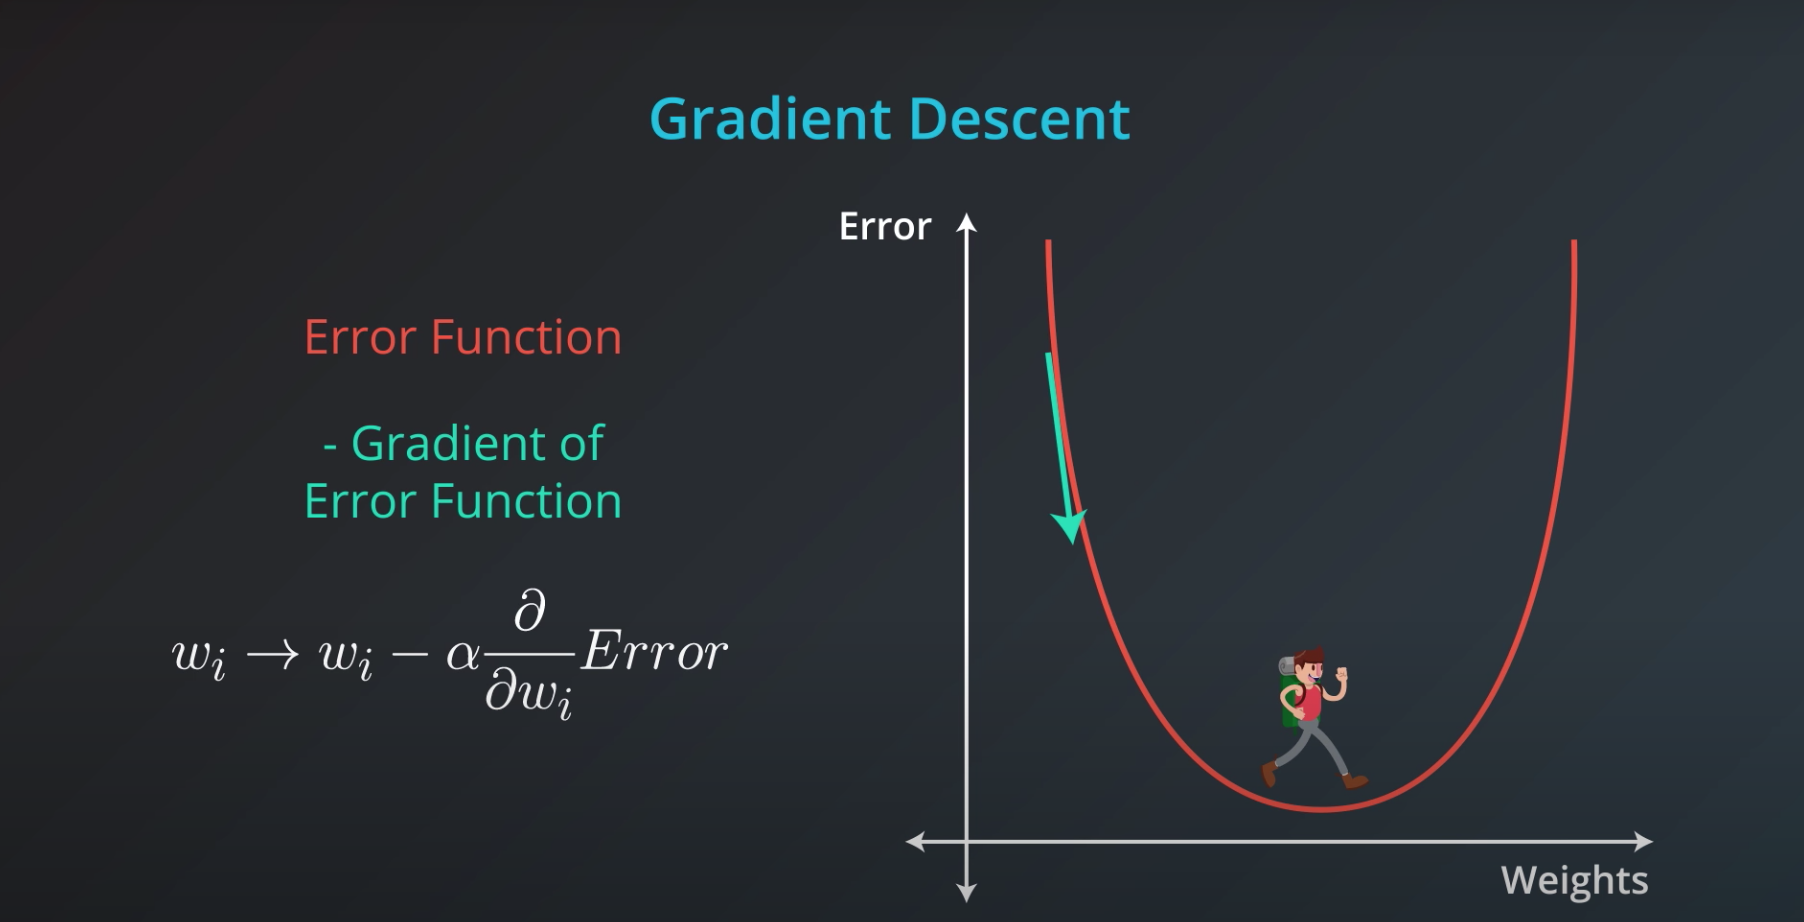 (copyright Udacity Intro to ML course)

Mean Absolute Error - average of all absolute errors or in other words the sum of all the absolute value of hte distances from the line to the data points divided by m or # of data points in set. 
Try to find the place here the line provides the best MAE. 
Note remember you flip y hat - y if line is under 
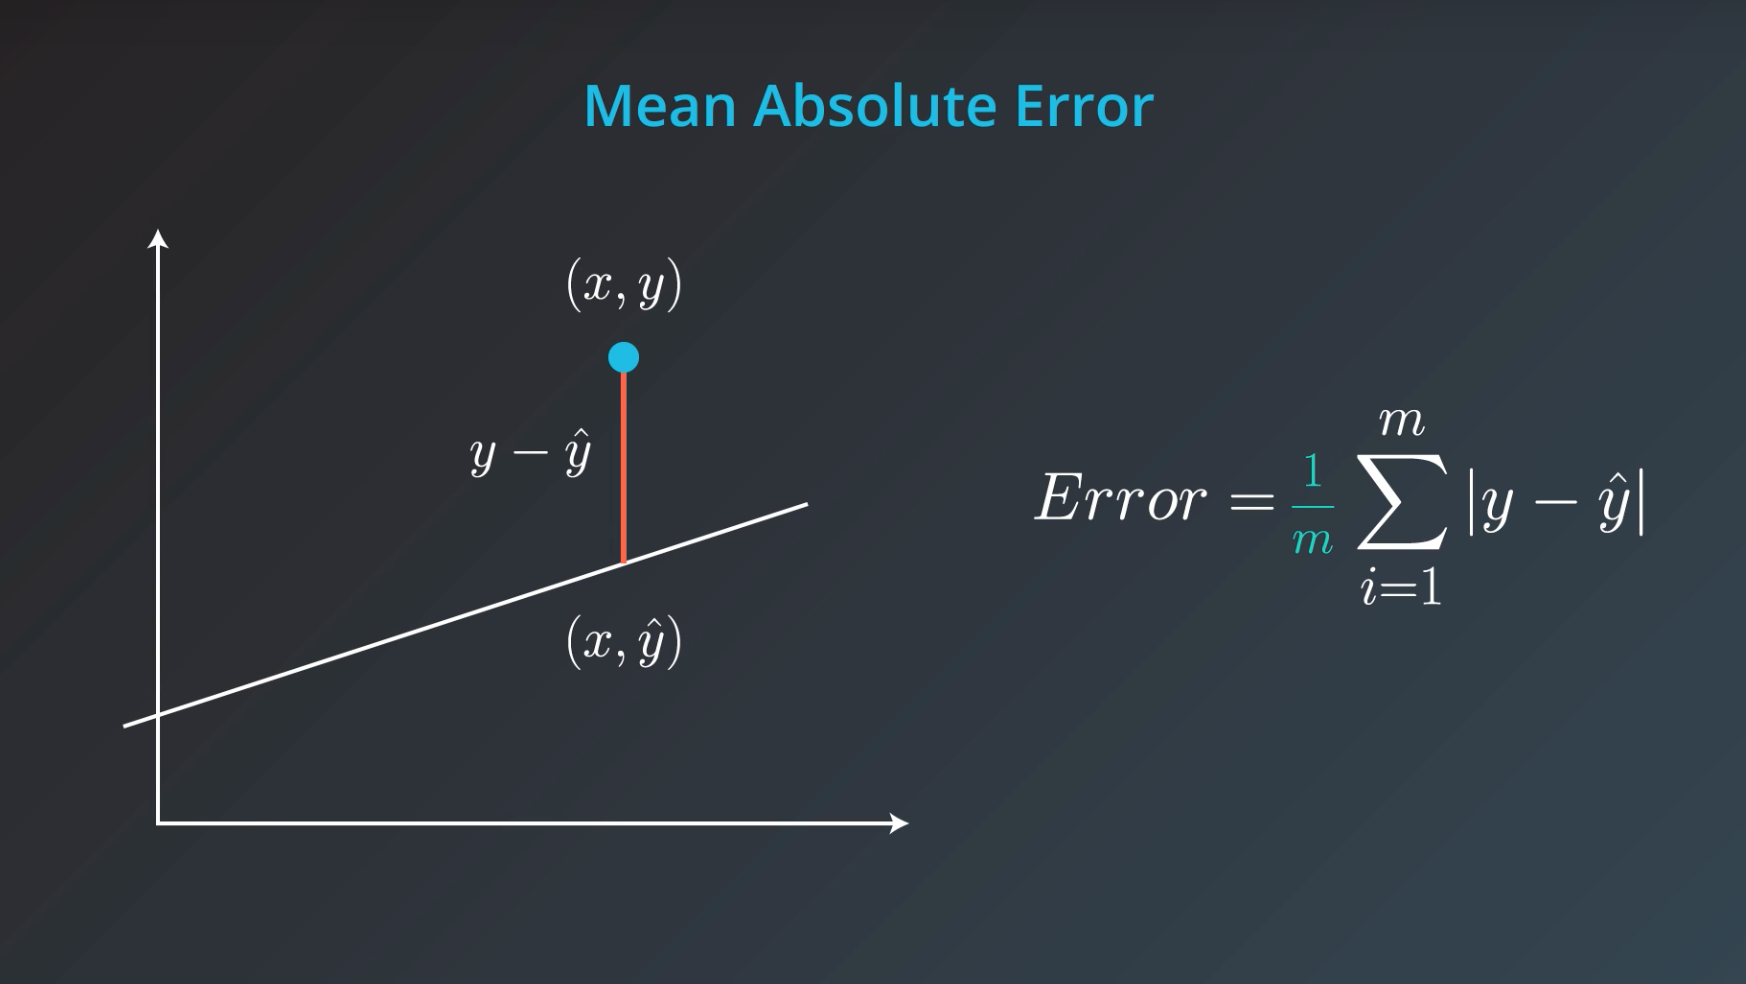

Ex. for mean absolute error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)


Mean Squared Error - Error is the average of the area of all the squares - then minimizing the average of the areas of the squares 
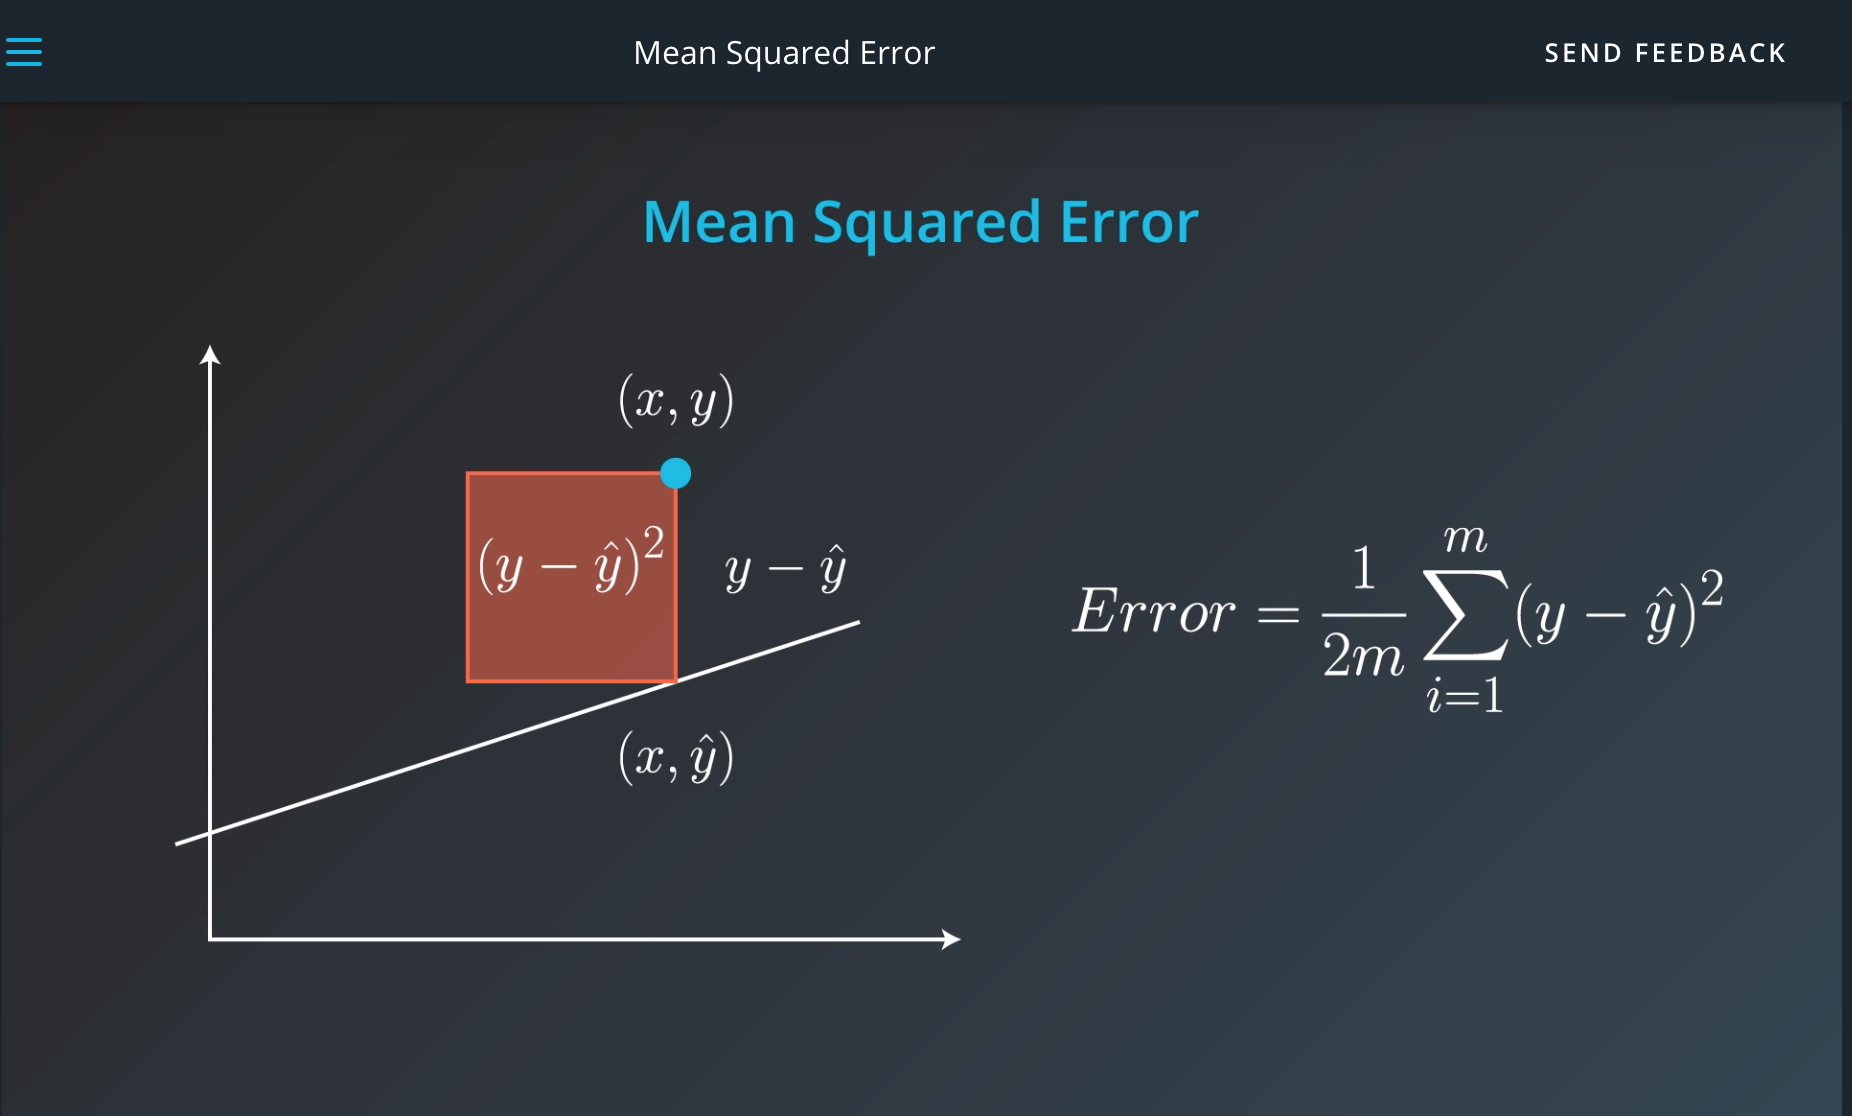

Ex. mean squared error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)

Mini-Batch Gradient Descent

In [ ]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# implement a gradient descent
# step for linear regression, following a squared error rule.
def MSEStep(X, y, W, b, learn_rate = 0.001):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()